In [7]:
# coding=utf-8
from scapy.all import *
import binascii
import socket, struct
import time

import crcmod
import libnum

from scapy.layers.inet import IP, UDP
from scapy.layers.l2 import Ether

import numpy as np

plc_cube = []
hmi_cube = []

seq = []

def ip2long(ip):
    """
    Convert an IP string to long
    """
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

def packet_analysis(pkt):
    if TCP in pkt and IP in pkt:
        if pkt[TCP].seq not in seq:
            d_time = float(str(pkt.time))
            seq.append(pkt[TCP].seq)
            if(pkt[TCP].dport == 44818 and pkt[IP].len > 40):
                s_ip = ip2long(pkt[IP].src)
                d_ip = ip2long(pkt[IP].dst)
                hmi_cube.append(np.asarray([s_ip,d_ip,d_time]))
            if(pkt[TCP].sport == 44818 and pkt[IP].len > 40):
                s_ip = ip2long(pkt[IP].src)
                d_ip = ip2long(pkt[IP].dst)
                plc_cube.append(np.asarray([s_ip,d_ip,d_time]))

2


In [8]:
try:
    #print(ifaces)
    #sniff(iface="Realtek PCIe GbE Family Controller", prn=packet_analysis, filter="udp port 18507")
    sniff(offline='DataSet/Dex2019_0002_attack3.pcap', prn=packet_analysis, store=0, count=10000)
    plc_cube = np.asarray(plc_cube)
    hmi_cube = np.asarray(hmi_cube)
    print('Completed')

except Exception as sniff_dec_err:
    traceback.print_exc()
    print(str(sniff_dec_err))

Completed


In [38]:
#fourier = np.fft.fft(hmi_cube)

In [39]:
print(hmi_cube.shape)
print(plc_cube.shape)
print(plc_cube[2][0])

(450, 3)
(423, 3)
3232235826.0


In [40]:
dst1 = hmi_cube[hmi_cube[:,0]==[ip2long('192.168.1.10')]]
print(dst1.shape)
dst2 = dst1[dst1[:,1]==[ip2long('192.168.1.20')]]
print(dst2.shape)

(234, 3)
(66, 3)


In [41]:
#print(dst2.shape)
#print(dst2)
hmi_data = dst2[:,2]
print(hmi_data.shape)

(66,)


In [42]:
hmi_diff = np.diff(hmi_data)
print(hmi_diff.shape)
print(hmi_diff)
#print(hmi_diff)

(65,)
[1.49979591e-02 1.45890713e-02 4.42981720e-04 5.46813011e-03
 1.90734863e-06 9.82403755e-03 4.08887863e-04 9.10758972e-05
 1.56860352e-02 4.05311584e-06 3.95584106e-03 2.14576721e-06
 2.08308697e-02 1.25169754e-04 2.53529549e-02 4.93097305e-03
 5.89799881e-03 1.45609379e-02 9.41991806e-04 2.46760845e-02
 1.90734863e-06 2.14576721e-06 7.25030899e-04 1.43899918e-02
 9.53674316e-07 1.44004822e-04 2.31027603e-04 1.02458000e-02
 1.47240162e-02 2.14576721e-06 4.68587875e-03 5.56945801e-04
 1.96950436e-02 5.25903702e-03 8.10623169e-06 5.02824783e-04
 1.46551132e-02 5.00679016e-06 1.51920319e-02 2.86102295e-06
 5.20300865e-03 4.05311584e-06 1.61719322e-02 1.12056732e-04
 1.42059326e-02 1.61170959e-04 2.58598328e-02 1.28030777e-04
 9.89818573e-03 9.53674316e-07 4.63986397e-03 9.46044922e-04
 2.14576721e-06 2.05538273e-02 3.79109383e-03 1.76906586e-04
 1.64985657e-04 5.47695160e-03 1.50570869e-02 5.00679016e-06
 5.40614128e-03 1.47578716e-02 1.13010406e-04 1.47104263e-04
 1.27291679e-03]


1999.9999999999995
[41.53846154  7.69230769  1.53846154  0.          0.          0.
  0.          3.07692308  0.          4.61538462  7.69230769  1.53846154
  0.          0.          0.          0.          0.          0.
  0.          3.07692308  1.53846154  0.          0.          0.
  0.          0.          0.          0.          3.07692308  9.23076923
  3.07692308  1.53846154  1.53846154  0.          0.          0.
  0.          0.          0.          1.53846154  0.          3.07692308
  0.          0.          0.          0.          0.          0.
  0.          1.53846154  1.53846154  1.53846154  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.       

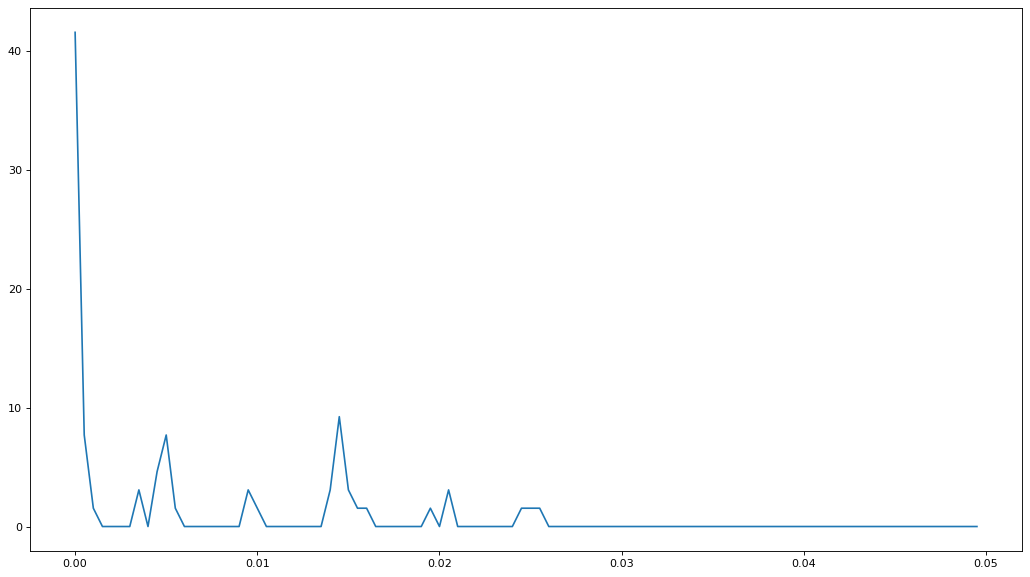

In [43]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')

maxrange = 0.05

data = hmi_diff[:300]
hist, bin_edges = np.histogram(data, bins=100, range=(0.0,maxrange), density=True)
bin_edges = bin_edges[:-1]
prob = hist[:]*maxrange
print(sum(hist))
#print(max(prob))
print(prob)
print(np.sum(prob))
mat = np.vstack((prob,bin_edges))

plt.plot(bin_edges,prob)

/home/xalanaseon/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xalanaseon/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xalanaseon/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xalanaseon/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xalanaseon/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/xalanaseon/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in t

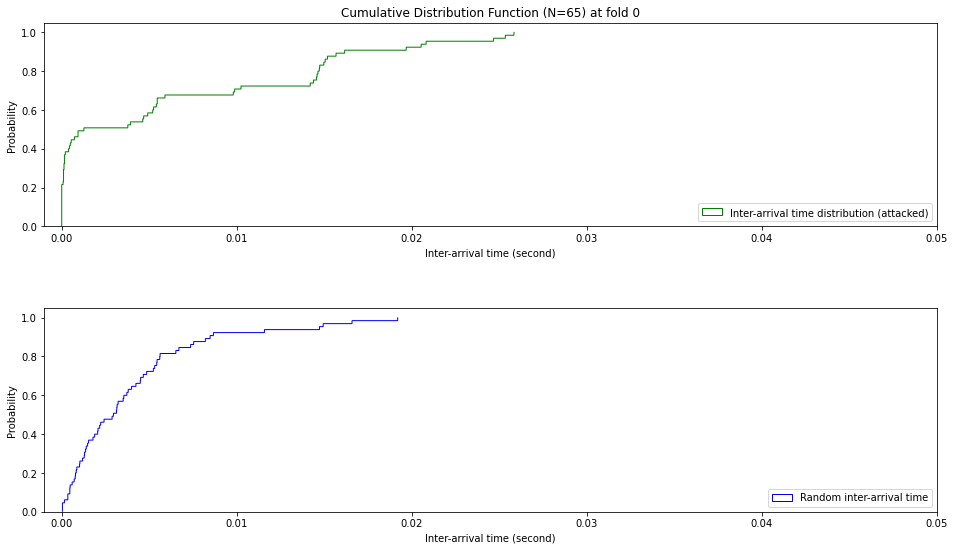

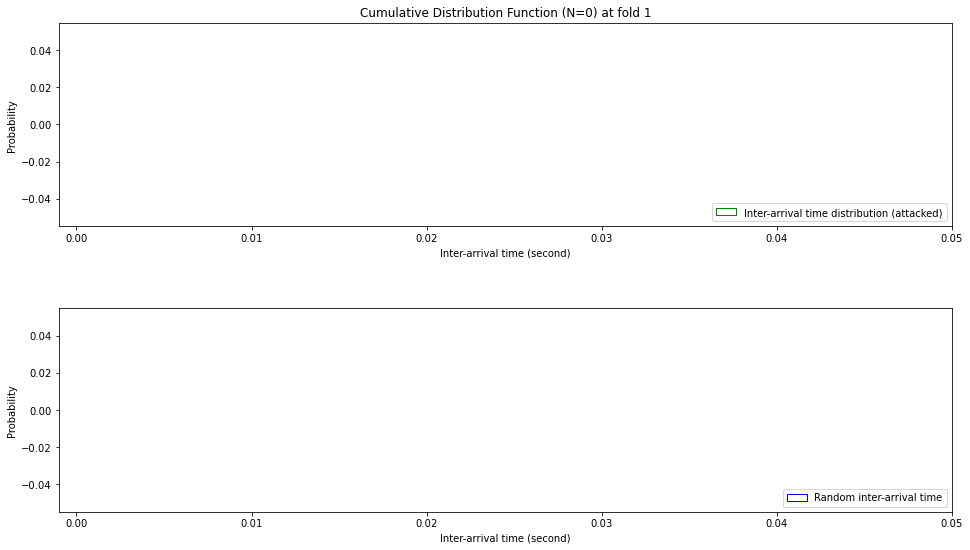

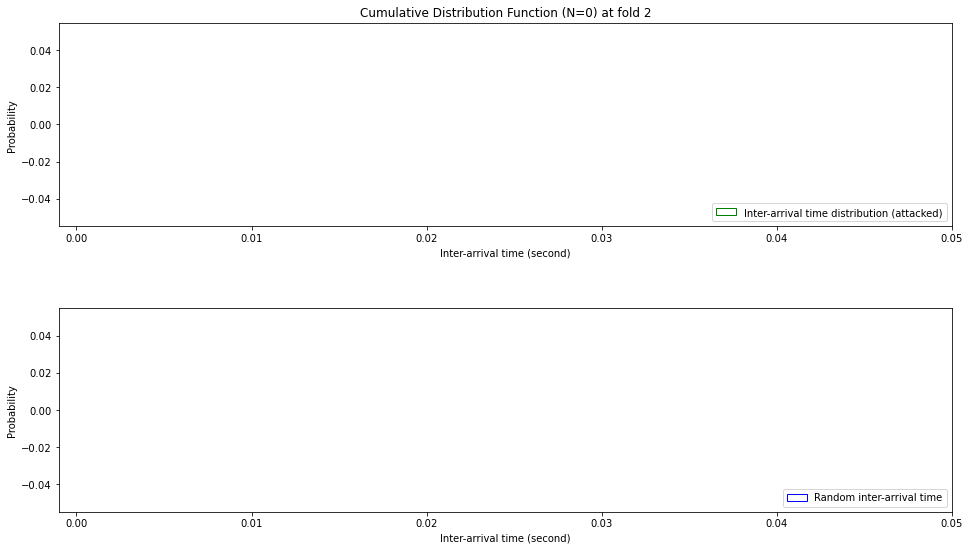

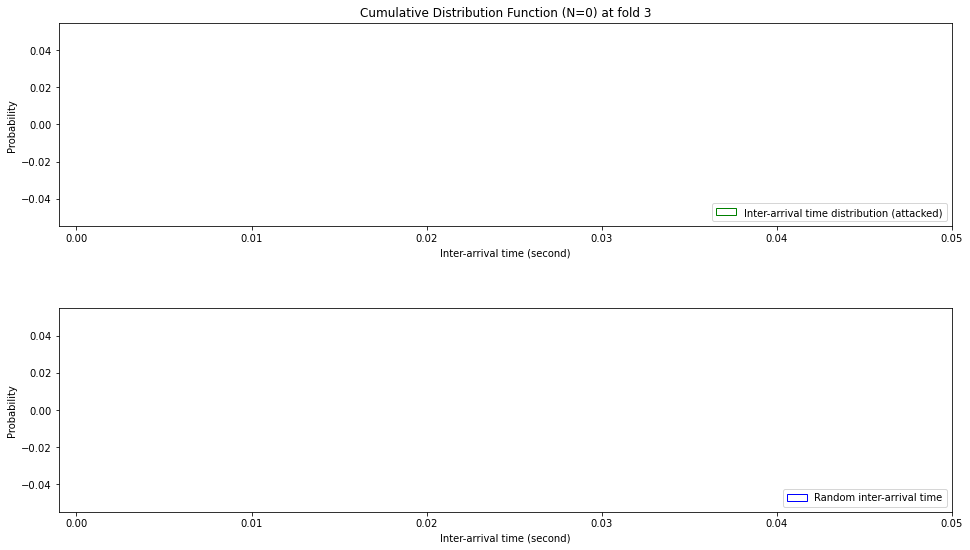

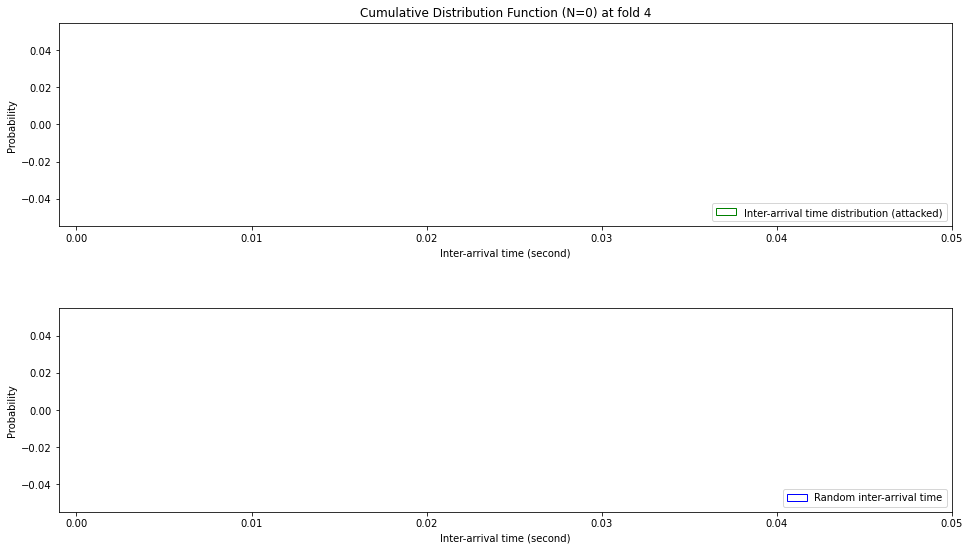

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#fig1, ax = plt.subplots()
for k in range(5):

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))
    fig.subplots_adjust(hspace=0.4)

    #### First, plot the empirical result
    fold = k*100
    y = hmi_diff[fold:fold+100]
    n_bins = 1000 #len(y)-1
    n, bins, patches = ax1.hist(y, n_bins, density=True, histtype='step',
              cumulative=True, label='Inter-arrival time distribution (attacked)', color='g')
    # the following line is used to remove the last point
    patches[0].set_xy(patches[0].get_xy()[:-1])
    ax1.set_xlim(-0.001, 0.05)
    ax1.set_xlabel('Inter-arrival time (second)')
    ax1.set_ylabel('Probability')
    ax1.set_title('Cumulative Distribution Function (N='+ str(len(y)) +') at fold ' + str(k))
    ax1.legend(loc=4)

    #### Then plot the theoretical expontential distribution
    G = np.random.default_rng()
    y = G.exponential(scale=0.005, size=len(y))
    # Now, plot the cumulative distributioin function (CDF)
    n_bins = 1000 #len(y)-1
    n, bins, patches = ax2.hist(y, n_bins, density=True, histtype='step',
              cumulative=True, label='Random inter-arrival time', color='b')
    # the following line is used to remove the last point
    patches[0].set_xy(patches[0].get_xy()[:-1])
    ax2.set_xlim(-0.001, 0.05)
    ax2.set_xlabel('Inter-arrival time (second)')
    ax2.set_ylabel('Probability')
    #ax2.set_title('Cumulative Distribution Function (N=100)')
    ax2.legend(loc=4)

plt.show()
#plt.savefig('./cdf.pdf')

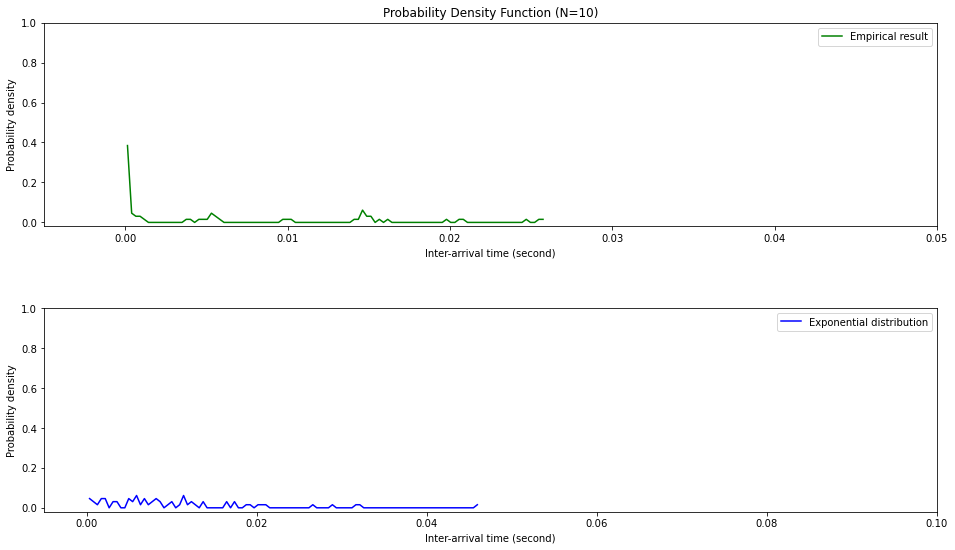

In [45]:
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))
fig.subplots_adjust(hspace=0.4)

#### First, plot the p.d.f. of our empirical result
y = hmi_diff
heights, bins = np.histogram(y, bins=100)
# do normalization
heights = heights/float(sum(heights))
binMids = bins[:-1]+np.diff(bins)/2.
ax1.plot(binMids, heights, label='Empirical result', color='g')
ax1.set_xlim(-0.005, 0.05)
ax1.set_ylim(-0.02,1.0)
ax1.set_xlabel('Inter-arrival time (second)')
ax1.set_ylabel('Probability density')
ax1.set_title('Probability Density Function (N=10)')
ax1.legend(loc=1)

#### Now, plot the p.d.f. of exponential distribution
G = np.random.default_rng()
y = G.exponential(scale=0.01, size=len(y))
heights, bins = np.histogram(y, bins=100)
# do normalization
heights = heights/float(sum(heights))
binMids = bins[:-1]+np.diff(bins)/2.
ax2.plot(binMids, heights, label='Exponential distribution', color='b')
ax2.set_xlim(-0.005, 0.1)
ax2.set_ylim(-0.02, 1.0)
ax2.set_xlabel('Inter-arrival time (second)')
ax2.set_ylabel('Probability density')
ax2.legend(loc=1)

plt.show()


1.0000000000000009


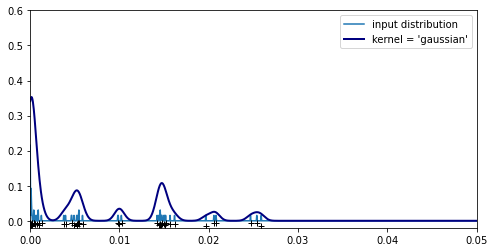

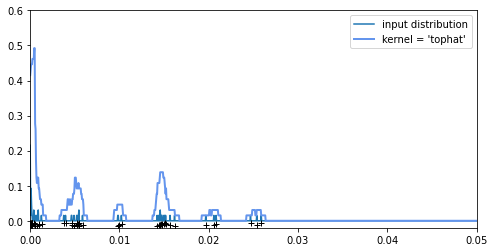

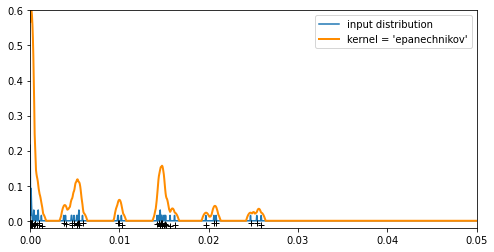

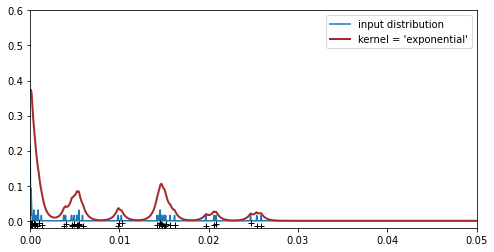

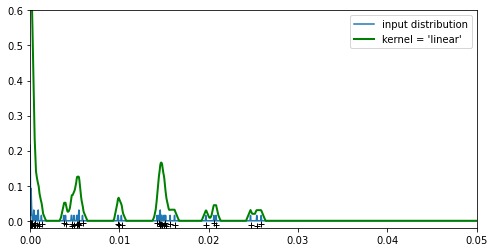

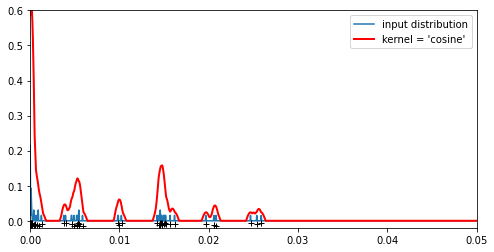

In [46]:
#%matplotlib inline

from numpy import array, linspace
from sklearn.neighbors.kde import KernelDensity
from matplotlib.pyplot import plot
# ----------------------------------------------------------------------
# Plot a 1D density example

maxrange = 0.05
N = 1000
np.random.seed(1)
#X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
#                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X = hmi_diff[:1000].reshape(-1,1)
X_plot = np.linspace(-0.0, maxrange, N)[:, np.newaxis]

#true_dens = (0.3 * norm(0, 0.01).pdf(X_plot[:, 0])
#             + 0.7 * norm(0.1, 0.04).pdf(X_plot[:, 0]))

hist, bin_edges = np.histogram(hmi_diff[:3000], bins=N, range=(0.0,maxrange), density=True)
bin_edges = bin_edges[:-1]
true_dens = hist[:]*maxrange*(1/N)
print(np.sum(true_dens))
#print(true_dens)
#fig, ax = plt.subplots(figsize=(16,9))
#ax.plot(X_plot[:, 0], true_dens,label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange', 'brown', 'green', 'red']
kernels = ['gaussian', 'tophat', 'epanechnikov','exponential', 'linear', 'cosine']
#kernels = ['epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    fig, ax = plt.subplots(figsize=(8,4))
    ax.plot(X_plot[:, 0], true_dens,label='input distribution')
    kde = KernelDensity(kernel=kernel, bandwidth=0.0005).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens)/1000, color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

    #ax.text(6, 0.38, "N={0} points".format(N))
    ax.legend(loc='upper right')
    ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

    ax.set_xlim(-0.0, maxrange)
    ax.set_ylim(-0.02, 0.6)
    
plt.show()

[0.61983853 0.04663415 0.12090815 0.06076844 0.15820686 0.03489524
 0.02409352 0.01063246 0.04372581 0.02416586 0.02347935 0.03374312]
Minima: [0.0042042  0.01566567 0.02007007 0.02017017 0.02487487 0.02517518]
Maxima: [0.0001001  0.00385385 0.00530531 0.00995996 0.01476476 0.01591592
 0.01971972 0.02012012 0.02067067 0.02467467 0.02502503 0.02562563]


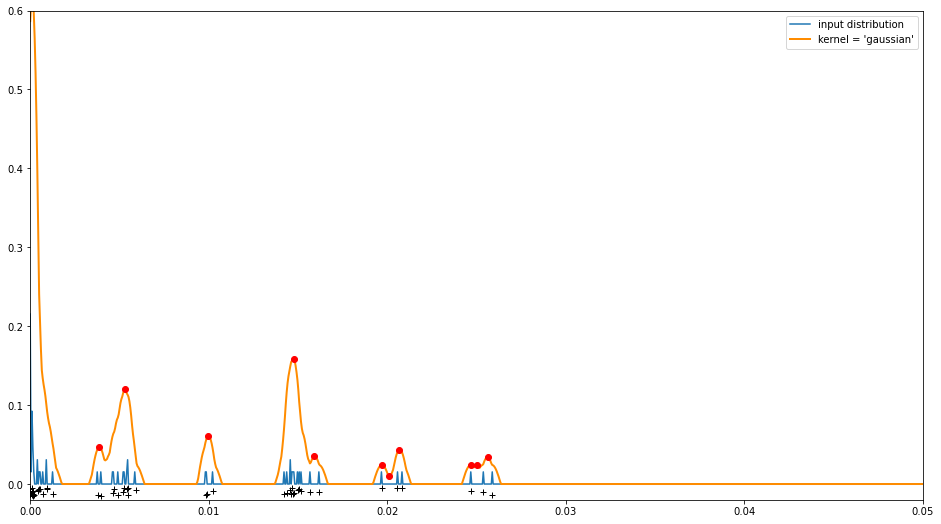

In [47]:
from scipy.signal import argrelextrema
from scipy.signal import find_peaks

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(X_plot[:, 0], true_dens,label='input distribution')
kde = KernelDensity(kernel=kernel, bandwidth=0.0005).fit(X)
log_dens = kde.score_samples(X_plot)
dens = np.exp(log_dens)/1000
peaks, _ = find_peaks(dens, height=0.001)

ax.plot(X_plot[:, 0], dens, color='darkorange', lw=2,
        linestyle='-', label="kernel = '{0}'".format('gaussian'))
ax.plot(X_plot[peaks],dens[peaks], "ro")
print(dens[peaks])
#ax.text(6, 0.38, "N={0} points".format(N))
ax.legend(loc='upper right')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-0.0, maxrange)
ax.set_ylim(-0.02, 0.6)

s = X_plot[:, 0]
e = np.exp(log_dens)/1000
a = X
mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print("Minima:", s[mi])
print("Maxima:", s[ma])


Text(0, 0.5, 'Probability')

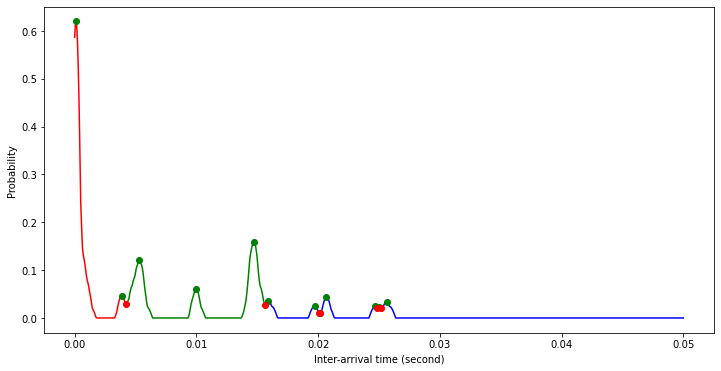

In [48]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(s[:mi[0]+1], e[:mi[0]+1], 'r',
     s[mi[0]:mi[1]+1], e[mi[0]:mi[1]+1], 'g',
     s[mi[1]:], e[mi[1]:], 'b',
     s[ma], e[ma], 'go',
     s[mi], e[mi], 'ro')

ax.set_xlabel('Inter-arrival time (second)')
ax.set_ylabel('Probability')
#ax.legend(loc='upper right')

Text(0, 0.5, 'Probability')

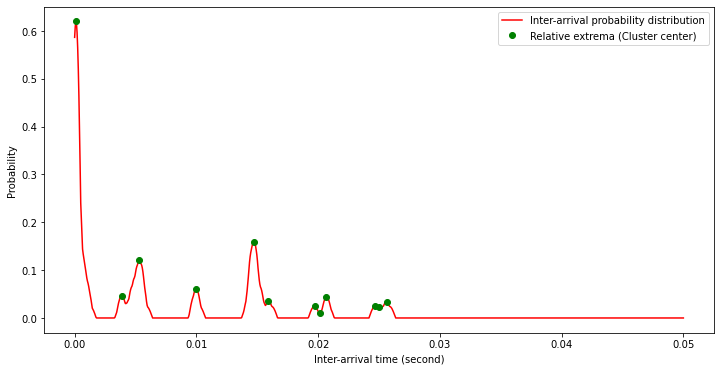

In [49]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(s[:], e[:], 'r',label='Inter-arrival probability distribution')
ax.plot(s[ma], e[ma], 'go',label='Relative extrema (Cluster center)')
#ax.plot(s[mi], e[mi], 'ro',label='Minima cluster center')
ax.legend(loc='upper right')
ax.set_xlabel('Inter-arrival time (second)')
ax.set_ylabel('Probability')